In [ ]:
pip install pandas 


In [ ]:
pip install seaborn

In [6]:
# import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modules imported")

Modules imported


Importing covid dataset

In [7]:
dataset_corona = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
dataset_corona.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [37]:
# check the shape of the dataframe
dataset_corona.shape

(266, 102)

Delete the useless columns

In [ ]:
# delete the useless columns # axis=1 means column
dataset_corona.drop(["Lat","Long"],axis=1,inplace=True)  

Aggregating the eows by the country 

In [39]:
dataset_corona_aggregated = dataset_corona.groupby('Country/Region').sum()

In [40]:
dataset_corona_aggregated.shape

(187, 101)

Visualizing data related for Mexico

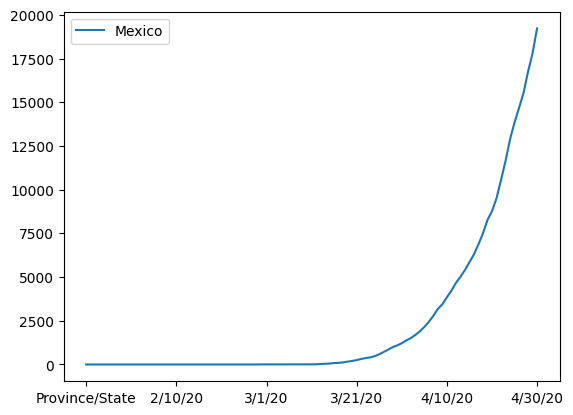

In [41]:
dataset_corona_aggregated.loc["Mexico"].plot()
plt.legend()

Calculating and plotting the first derivate of the curve

<Axes: >

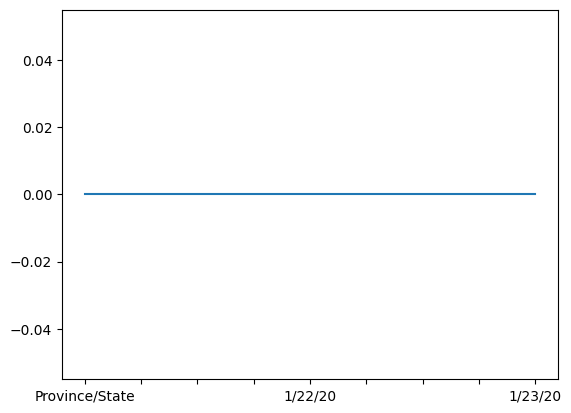

In [46]:
dataset_corona_aggregated.loc["Mexico"][:3].plot()

The first derivative of the curve

<Axes: >

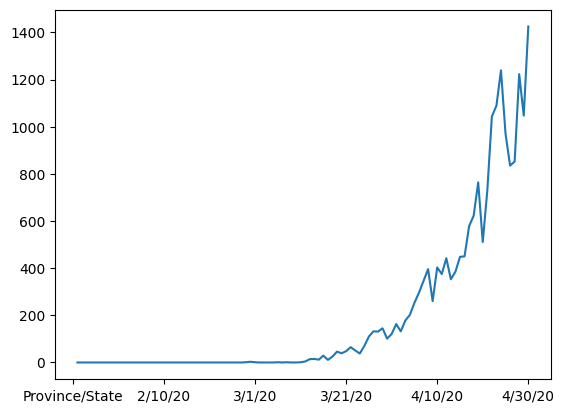

In [49]:
dataset_corona_aggregated.loc["Mexico"].diff().plot()

Shows the infection rate day by day in our period

In [50]:
dataset_corona_aggregated.loc["Mexico"].diff().max()

1425

This tell us that in one day 1425 new infected cases has been recorded in only 24 hours

# Create a new dataframe with the max rate infection for each country 

In [ ]:
# create a list of all countries
countries = list(dataset_corona_aggregated.index)
# create a empty list named max_infection_rates
max_infection_rates = []
# loop through the countries list and append the max infection rate of each country to the max_infection_rates list
for c in countries:
    max_infection_rates.append(dataset_corona_aggregated.loc[c].diff().max())
# create a new column named max_infection_rate and assign the max_infection_rates list to it
dataset_corona_aggregated["max_infection_rate"] = max_infection_rates

In [52]:
dataset_corona_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [ ]:
data_corona = pd.DataFrame(dataset_corona_aggregated["max_infection_rate"])

In [ ]:
data_corona.head()

Import dataset

In [59]:
dataset_happiness = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [60]:
dataset_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


clear dataset

In [61]:
ussless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [62]:
happiness_report = dataset_happiness.drop(ussless_cols,axis=1)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


Changing the indices of the dataframe

In [ ]:
# set the index of the dataframe to the Country or region column
happiness_report.set_index("Country or region",inplace=True) 

In [66]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Join the datasets

In [ ]:
data = data_corona.join(happiness_report,how="inner")
data.head()

Correlation matrix

In [ ]:
data.corr()

# Visualization of the results 

plotting GDP vs maximum infection rate

In [ ]:
# plot GDP vs maximum Infection rate
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))
# explaination: GDP per capita is the GDP divided by the population
# the log of the maximum infection rate is the maximum infection rate in a logarithmic scale
# the plot shows that the maximum infection rate increases as the GDP per capita increases

In [ ]:
# fix the curve into a linear regression
sns.regplot(x,np.log(y))